In [2]:
# Import necessary libraries
import pandas as pd              # for data handling
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns            # for enhanced plotting

# Load the dataset
df = pd.read_csv("data.csv")  # ensure data.csv is in the same folder

# Display the first few rows
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [3]:
# Check column types, null values, memory usage
df.info()

# Check how many missing values each column has
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [4]:
# If there are missing values in numerical columns:
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns (optional)
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical columns to encode
categorical_cols = ['Type_of_order', 'Type_of_vehicle']

# Create the column transformer with the correct OneHotEncoder syntax
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply encoding
df_encoded_array = encoder.fit_transform(df)

# Get encoded column names
encoded_col_names = encoder.named_transformers_['cat'].get_feature_names_out(categorical_cols)
non_encoded_cols = [col for col in df.columns if col not in categorical_cols]
final_columns = list(encoded_col_names) + non_encoded_cols

# Create the final DataFrame
df_encoded = pd.DataFrame(df_encoded_array, columns=final_columns)

# View the encoded data
df_encoded.head()


,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
0,0.0,0.0,1.0,0.0,1.0,0.0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,24
1,0.0,0.0,1.0,0.0,0.0,1.0,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,33
2,1.0,0.0,0.0,0.0,1.0,0.0,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.6784,12.924264,77.6884,26
3,0.0,0.0,0.0,0.0,1.0,0.0,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,21
4,0.0,0.0,1.0,0.0,0.0,1.0,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,30


In [7]:
from math import radians, cos, sin, asin, sqrt

# Define haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # Haversine formula
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Apply the formula to create a new column 'Distance_km'
df_encoded['Distance_km'] = df.apply(lambda row: haversine(
    float(row['Restaurant_latitude']),
    float(row['Restaurant_longitude']),
    float(row['Delivery_location_latitude']),
    float(row['Delivery_location_longitude'])
), axis=1)

# Preview the new distance column
df_encoded[['Distance_km']].head()


,Distance_km
0,3.025149
1,20.183530
2,1.552758
3,7.790401
4,6.210138


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define features and target for regression
X = df_encoded[["Distance_km", "Delivery_person_Age", "Delivery_person_Ratings"]]
y = df_encoded["Time_taken(min)"].astype(float)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print("Linear Regression Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Linear Regression Evaluation:
Mean Squared Error: 71.92875898646548
Mean Absolute Error: 6.64191881097084
R² Score: 0.1796271947594914


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create binary label: 0 = Fast (<=30 mins), 1 = Delayed
df_encoded["Delivery_Status"] = df_encoded["Time_taken(min)"].astype(float).apply(lambda x: 0 if x <= 30 else 1)

# Define features and target
X_class = df_encoded[["Distance_km", "Delivery_person_Age", "Delivery_person_Ratings"]]
y_class = df_encoded["Delivery_Status"]

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train Logistic Regression
clf = LogisticRegression()
clf.fit(X_train_c, y_train_c)

# Predictions
y_pred_c = clf.predict(X_test_c)

# Evaluation
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))


Logistic Regression Evaluation:
Accuracy: 0.802390613005812
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      6402
           1       0.81      0.44      0.57      2717

    accuracy                           0.80      9119
   macro avg       0.80      0.70      0.72      9119
weighted avg       0.80      0.80      0.78      9119

Confusion Matrix:
 [[6115  287]
 [1515 1202]]


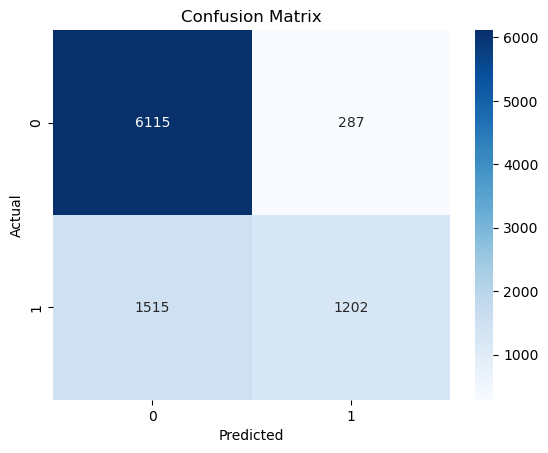

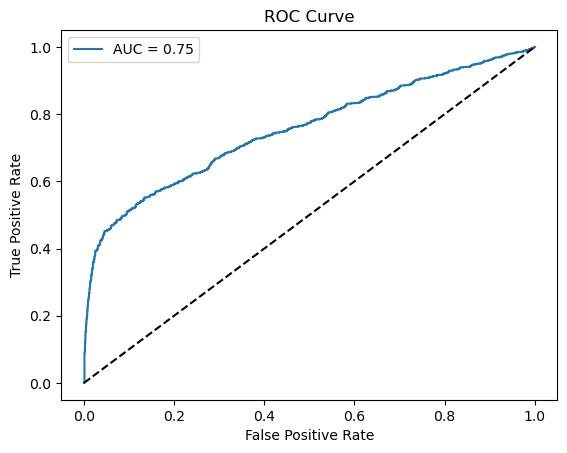

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_probs = clf.predict_proba(X_test_c)[:, 1]
fpr, tpr, _ = roc_curve(y_test_c, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
